# Muhammad Sami
## Roll no: 333185

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Load and Display Data

In [ ]:
df = pd.read_csv('covid_19_country_wise_latest.csv')

print("Dataset loaded successfully.")

# Display the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

: 

## Task 2: Set the Dataset index to Unnamed: 0


In [157]:
df.set_index('Unnamed: 0', inplace=True)

print("Dataset with Unnamed: 0 as index:")

print(df.head())

Dataset with Unnamed: 0 as index:
           Country/Region  Confirmed Deaths  Recovered  Active  New cases  \
Unnamed: 0                                                                  
0             Afghanistan      36263   1269      25198    9796      106.0   
1                 Albania       4880    144       2745    1991      117.0   
2                 Algeria      27973   1163      18837    7973      616.0   
3                 Andorra        907     52        803      52       10.0   
4                  Angola        950     41        242     667       18.0   

            New deaths  New recovered  Deaths / 100 Cases  \
Unnamed: 0                                                  
0                 10.0             18                3.50   
1                  6.0             63                2.95   
2                  8.0            749                4.16   
3                  0.0              0                5.73   
4                  1.0              0                4.32   

##  Task 3: Replace the index column name with 'index'

In [158]:
df.index.name = 'index'
print("Dataset with index as index name:")
print(df.head())

Dataset with index as index name:
      Country/Region  Confirmed Deaths  Recovered  Active  New cases  \
index                                                                  
0        Afghanistan      36263   1269      25198    9796      106.0   
1            Albania       4880    144       2745    1991      117.0   
2            Algeria      27973   1163      18837    7973      616.0   
3            Andorra        907     52        803      52       10.0   
4             Angola        950     41        242     667       18.0   

       New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
index                                                                         
0            10.0             18                3.50                  69.49   
1             6.0             63                2.95                  56.25   
2             8.0            749                4.16                  67.34   
3             0.0              0                5.73              

## Task 4: Create Function to replace whitespace with underscore

In [159]:

def replace_whitespace_with_underscore(dataframe):
    # Create a copy of columns
    new_columns = []
    for col in dataframe.columns:
        # Replace whitespace with underscore
        new_col = col.replace(' ', '_')
        new_columns.append(new_col)
    
    dataframe.columns = new_columns
    return dataframe

df = replace_whitespace_with_underscore(df)
print(df.head())

      Country/Region  Confirmed Deaths  Recovered  Active  New_cases  \
index                                                                  
0        Afghanistan      36263   1269      25198    9796      106.0   
1            Albania       4880    144       2745    1991      117.0   
2            Algeria      27973   1163      18837    7973      616.0   
3            Andorra        907     52        803      52       10.0   
4             Angola        950     41        242     667       18.0   

       New_deaths  New_recovered  Deaths_/_100_Cases  Recovered_/_100_Cases  \
index                                                                         
0            10.0             18                3.50                  69.49   
1             6.0             63                2.95                  56.25   
2             8.0            749                4.16                  67.34   
3             0.0              0                5.73                  88.53   
4             1.0    

## Task 5: Check Basic Information

In [160]:
print("Column names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Column names:
['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases', 'Recovered_/_100_Cases', 'Deaths_/_100_Recovered', 'Confirmed_last_week', '1_week_change', '1_week_%_increase', 'WHO_Region']

Data types:
Country/Region             object
Confirmed                   int64
Deaths                     object
Recovered                   int64
Active                      int64
New_cases                 float64
New_deaths                float64
New_recovered               int64
Deaths_/_100_Cases        float64
Recovered_/_100_Cases     float64
Deaths_/_100_Recovered    float64
Confirmed_last_week         int64
1_week_change               int64
1_week_%_increase         float64
WHO_Region                 object
dtype: object

Missing values:
Country/Region             0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
New_cases                 10
N

## Task 6: Fill NaN values with the mean of the columns

In [161]:

# First, let's identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:")
print(numeric_columns)

# Fill NaN values with mean for numeric columns
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

print("Dataset with NaN values filled with mean:")
print(df.isnull().sum())

Numeric columns:
['Confirmed', 'Recovered', 'Active', 'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases', 'Recovered_/_100_Cases', 'Deaths_/_100_Recovered', 'Confirmed_last_week', '1_week_change', '1_week_%_increase']
Dataset with NaN values filled with mean:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New_cases                 0
New_deaths                0
New_recovered             0
Deaths_/_100_Cases        0
Recovered_/_100_Cases     0
Deaths_/_100_Recovered    0
Confirmed_last_week       0
1_week_change             0
1_week_%_increase         0
WHO_Region                0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_6804\944013475.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


## Task 7: Count the number of unique countries

In [162]:
# Let's identify categorical columns
unique_countries_count = df['Country/Region'].nunique()
print(f"Number of unique countries in the dataset: {unique_countries_count}")

Number of unique countries in the dataset: 187


## Task 8: Check for duplicate country entries and remove if needed

In [163]:
# Check for duplicates
duplicates = df['Country/Region'].duplicated().sum()
print(f"Number of duplicate country entries: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(subset=['Country/Region'], keep='first', inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

Number of duplicate country entries: 0
No duplicates found.


## Task 9: Find the mean, median, and standard deviation of total cases

In [164]:

total_cases_mean = df['Confirmed'].mean()
total_cases_median = df['Confirmed'].median()
total_cases_std = df['Confirmed'].std()

print(f"Total Cases - Mean: {total_cases_mean:.2f}")
print(f"Total Cases - Median: {total_cases_median:.2f}")
print(f"Total Cases - Standard Deviation: {total_cases_std:.2f}")

Total Cases - Mean: 88130.94
Total Cases - Median: 5059.00
Total Cases - Standard Deviation: 383318.66


 ## Task 10: Find string in Deaths column and replace with mean

In [165]:

print("Unique values in Deaths column:")
print(df['Deaths'].unique())

# Finding the string values in Deaths column
string_mask = df['Deaths'].apply(lambda x: isinstance(x, str))
string_indices = df[string_mask].index.tolist()
print(f"String values found at indices: {string_indices}")

if len(string_indices) > 0:
    # Calculate mean of Death column (excluding string values)
    numeric_deaths = pd.to_numeric(df['Deaths'], errors='coerce')
    deaths_mean = numeric_deaths.mean()
    
    # Replace string values with mean
    df.loc[string_mask, 'Deaths'] = deaths_mean
    print(f"Replaced string values with mean: {deaths_mean:.2f}")
else:
    print("No string values found in Deaths column.")

Unique values in Deaths column:
['1269' '144' '1163' '52' '41' '3' '3059' '711' '167' '713' '423' '11'
 '141' '2965' '7' '538' '9822' '2' '35' '0' '2647' '294' '87618' '347'
 '53' '6' '1' '22' '391' '8944' '59' '75' '9187' '4656' '8777' '54' '208'
 '115' '96' '139' '87' '19' '373' '613' '58' '1083' '5532' '4652' '408'
 '51' '69' '34' '228' '329' '30212' '49' '8' '16' '9125' '168' '202'
 '1761' '45' '26' '20' '158' '1166' '596' '10' '33408' '4838' '15912'
 '4458' '1764' '474' '35112' '998' '585' '285' '185' '438' '1301' '31'
 '12' '72' '64' '80' '112' '91' '99' '124' '15' '9' '156' '44022' '748'
 '4' '316' '48' '6160' '108' '860' '466' '255' '393' '5842' '1322' '43'
 '18418' '1945' '1676' '1719' '165' '2206' '13334' '5' '42' '14' '2760'
 '194' '543' '66' '27' '28' '116' '93' '7067' '300' '46' '28432' '720'
 '24' '5700' '1978' '40' '60' '21' '18' '50' '5630' '148011' '1636' '345'
 '45844' '121' '146' '78' '483' '140' 'non']
String values found at indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1

## Task 11: Change the datatype of Deaths column

In [166]:

# Convert Deaths column to numeric
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
print("Deaths column datatype after conversion:")
print(df['Deaths'].dtype)

Deaths column datatype after conversion:
float64


## Task 12: Calculate total number of Death and Recovery all over the world

In [168]:

total_deaths = df['Deaths'].sum()
total_recoveries = df['Recovered'].sum()
print(f"Total Deaths worldwide: {total_deaths:,.0f}")
print(f"Total Recoveries worldwide: {total_recoveries:,.0f}")

Total Deaths worldwide: 657,516
Total Recoveries worldwide: 9,468,087


## Task 13: How many countries have more than 1 million total cases

In [169]:

countries_with_million_cases = df[df['Confirmed'] > 1000000]['Country/Region'].tolist()
print(f"Number of countries with more than 1 million cases: {len(countries_with_million_cases)}")
if len(countries_with_million_cases) > 0:
    print("These countries are:")
    for country in countries_with_million_cases:
        print(f"- {country}")

Number of countries with more than 1 million cases: 3
These countries are:
- Brazil
- India
- US


## Task 14: Which countries have a recovery rate above 95%

In [170]:

df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed']) * 100
high_recovery_countries = df[df['Recovery_Rate'] > 95]['Country/Region'].tolist()
print(f"Number of countries with recovery rate > 95%: {len(high_recovery_countries)}")
if len(high_recovery_countries) > 0:
    print("These countries are:")
    for country in high_recovery_countries:
        recovery_rate = df.loc[df['Country/Region'] == country, 'Recovery_Rate'].values[0]
        print(f"- {country}: {recovery_rate:.2f}%")

Number of countries with recovery rate > 95%: 12
These countries are:
- Brunei: 97.87%
- Djibouti: 98.38%
- Dominica: 100.00%
- Grenada: 100.00%
- Holy See: 100.00%
- Iceland: 98.33%
- Malaysia: 96.60%
- Mauritius: 96.51%
- New Zealand: 97.24%
- Norway: 95.84%
- Qatar: 97.02%
- Taiwan*: 95.24%


## Task 15: Drop columns WHO_Region and Confirmed

In [171]:
df.drop(['WHO_Region', 'Confirmed'], axis=1, inplace=True)
print("Columns after dropping WHO_Region and Confirmed:")
print(df.columns.tolist())

Columns after dropping WHO_Region and Confirmed:
['Country/Region', 'Deaths', 'Recovered', 'Active', 'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases', 'Recovered_/_100_Cases', 'Deaths_/_100_Recovered', 'Confirmed_last_week', '1_week_change', '1_week_%_increase', 'Recovery_Rate']


## Task 16: Find the Country with the Max Deaths

In [172]:
country_with_max_deaths = df.loc[df['Deaths'].idxmax(), 'Country/Region']
max_deaths = df['Deaths'].max()
print(f"Country with maximum deaths: {country_with_max_deaths}")
print(f"Number of deaths: {max_deaths:,.0f}")

Country with maximum deaths: Afghanistan
Number of deaths: 3,516


## Task 17: Sort Countries by Deaths (Descending Order)

In [173]:

sorted_by_deaths = df.sort_values(by='Deaths', ascending=False).reset_index(drop=True)
print("Top 10 countries by deaths:")
print(sorted_by_deaths[['Country/Region', 'Deaths']].head(10))

Top 10 countries by deaths:
    Country/Region       Deaths
0      Afghanistan  3516.129032
1         Pakistan  3516.129032
2            Nepal  3516.129032
3      Netherlands  3516.129032
4      New Zealand  3516.129032
5        Nicaragua  3516.129032
6            Niger  3516.129032
7          Nigeria  3516.129032
8  North Macedonia  3516.129032
9           Norway  3516.129032


## Task 18: Make new column Total_cases that have a sum of Deaths, Recovered, Active

In [174]:

df['Total_cases'] = df['Deaths'] + df['Recovered'] + df['Active']
print("Dataset with new Total_cases column:")
print(df[['Country/Region', 'Deaths', 'Recovered', 'Active', 'Total_cases']].head())

Dataset with new Total_cases column:
      Country/Region       Deaths  Recovered  Active   Total_cases
index                                                             
0        Afghanistan  3516.129032      25198    9796  38510.129032
1            Albania  3516.129032       2745    1991   8252.129032
2            Algeria  3516.129032      18837    7973  30326.129032
3            Andorra  3516.129032        803      52   4371.129032
4             Angola  3516.129032        242     667   4425.129032


## Task 19: Calculate Death_Rate for Each Country

In [175]:
df['Death_Rate'] = (df['Deaths'] / df['Total_cases']) * 100
print("Dataset with Death_Rate column:")
print(df[['Country/Region', 'Deaths', 'Total_cases', 'Death_Rate']].head())

Dataset with Death_Rate column:
      Country/Region       Deaths   Total_cases  Death_Rate
index                                                      
0        Afghanistan  3516.129032  38510.129032    9.130401
1            Albania  3516.129032   8252.129032   42.608750
2            Algeria  3516.129032  30326.129032   11.594388
3            Andorra  3516.129032   4371.129032   80.439836
4             Angola  3516.129032   4425.129032   79.458226


## Task 20: Identify countries where total cases are increasing but death rates remain low

In [176]:

# In this task, we can identify countries with:
# 1. High 1 week % increase (above median)
# 2. Low death rate (below median)

# Calculate medians
median_week_increase = df['1_week_%_increase'].median()
median_death_rate = df['Death_Rate'].median()

increasing_low_death = df[(df['1_week_%_increase'] > median_week_increase) & 
                          (df['Death_Rate'] < median_death_rate)]

print(f"Countries with increasing cases but low death rates (count: {len(increasing_low_death)}):")
print(increasing_low_death[['Country/Region', '1_week_%_increase', 'Death_Rate']].head(10))

Countries with increasing cases but low death rates (count: 53):
               Country/Region  1_week_%_increase  Death_Rate
index                                                       
2                     Algeria              18.07   11.594388
6                   Argentina              28.02    2.094516
8                   Australia              23.13   18.851087
10                 Azerbaijan               9.16   10.483662
13                 Bangladesh               9.05    1.550485
20                    Bolivia              16.71    4.880115
21     Bosnia and Herzegovina              23.81   25.627522
23                     Brazil              15.28    0.149098
25                   Bulgaria              18.95   25.497434
37                   Colombia              26.03    1.396175


## Task 21: Print head of only 2 columns Country/Region and Death_Rate

In [177]:

death_rate = ['Country/Region', 'Death_Rate']
print(df[death_rate].head())


      Country/Region  Death_Rate
index                           
0        Afghanistan    9.130401
1            Albania   42.608750
2            Algeria   11.594388
3            Andorra   80.439836
4             Angola   79.458226


## Task 22: Create a scatter plot comparing total cases and total deaths

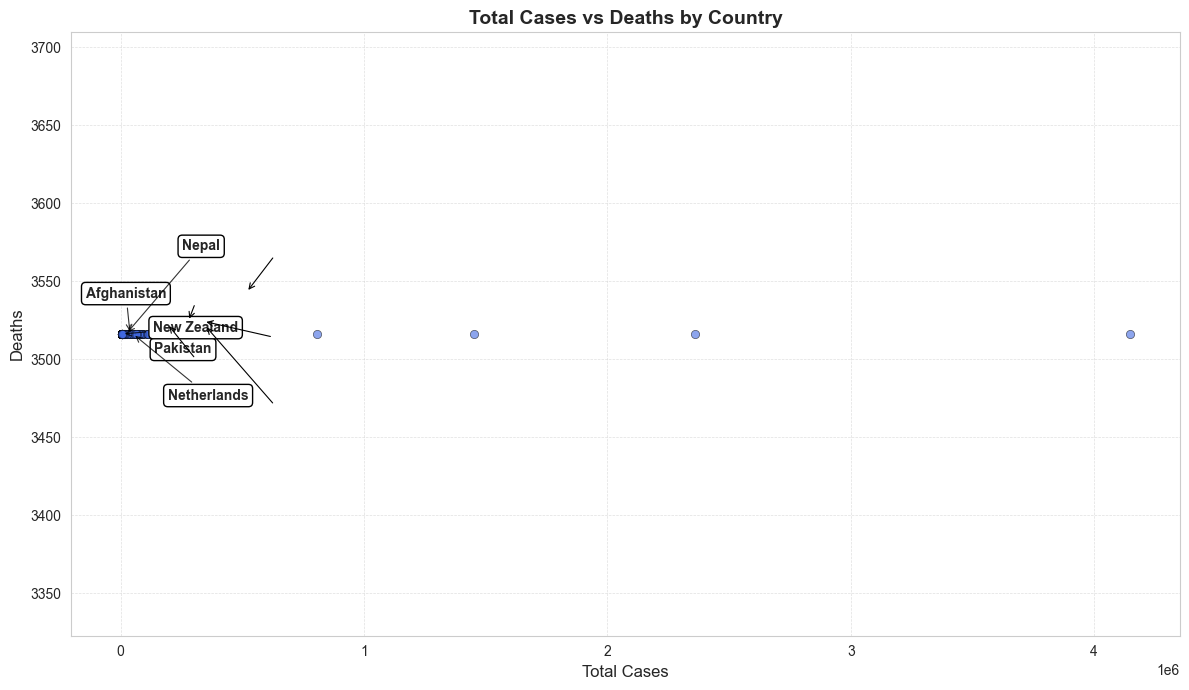

In [188]:

from adjustText import adjust_text

sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))

# Scatter plot
plt.scatter(df['Total_cases'], df['Deaths'], alpha=0.6, color='royalblue', edgecolors='black', linewidth=0.5)

plt.title('Total Cases vs Deaths by Country', fontsize=14, fontweight='bold')
plt.xlabel('Total Cases', fontsize=12)
plt.ylabel('Deaths', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Annotate with better positioning
texts = []
top_countries = sorted_by_deaths.head(5)['Country/Region'].tolist()
for country in top_countries:
    country_data = df[df['Country/Region'] == country]
    x = country_data['Total_cases'].values[0]
    y = country_data['Deaths'].values[0]
    
    text = plt.annotate(
        country, (x, y),
        textcoords="offset points",
        xytext=(np.random.randint(-40, 40), np.random.randint(10, 40)),  # Randomized spread
        ha='center',
        fontsize=10, fontweight='bold',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
        arrowprops=dict(arrowstyle="->", color='black', lw=0.8, alpha=0.8)
    )
    texts.append(text)

# Auto-adjust text to prevent overlap with stronger settings
adjust_text(texts, 
            expand_points=(2.5, 2.5), 
            expand_text=(1.5, 2.0), 
            force_text=(0.5, 0.7), 
            arrowprops=dict(arrowstyle="->", color='black', lw=0.8))

plt.tight_layout()
plt.show()


## Task 23: Save dataset in CSV format

In [189]:
df.to_csv('processed_covid_data.csv', index=True)
print("Dataset saved as 'processed_covid_data.csv'")

Dataset saved as 'processed_covid_data.csv'
